In [1]:
import cfe
import scanpy as sc
cfe.settings.backend = "dynverse_docker"

[2025年01月14日 21时41分59秒] INFO                                                                                 
                                          _____     _ _ ______    _       ______            _                      
                                         / ____|   | | |  ____|  | |     |  ____|          | |                     
                                        | |     ___| | | |__ __ _| |_ ___| |__  __  ___ __ | | ___  _ __ ___ _ __  
                                        | |    / _ \ | |  __/ _` | __/ _ \  __| \ \/ / '_ \| |/ _ \| '__/ _ \ '__| 
                                        | |___|  __/ | | | | (_| | ||  __/ |____ >  <| |_) | | (_) | | |  __/ |    
                                         \_____\___|_|_|_|  \__,_|\__\___|______/_/\_\ .__/|_|\___/|_|  \___|_|    
                                                                                     | |                           
                                                                              

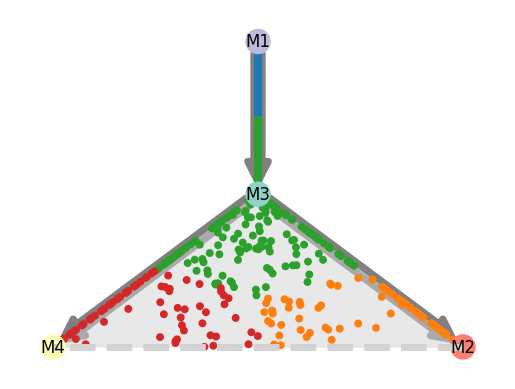

AnnData object with n_obs × n_vars = 926 × 1128
    obs: 'c', 'milestone_color', 'milestone'
    var: 'feature_id', 'housekeeping'
    uns: 'cfe', 'pca', 'tsne', 'milestone_color_colors', 'milestone_colors'
    obsm: 'X_pca', 'X_tsne', 'milestone_network_emb'
    varm: 'PCs'
    layers: 'expression', 'counts'

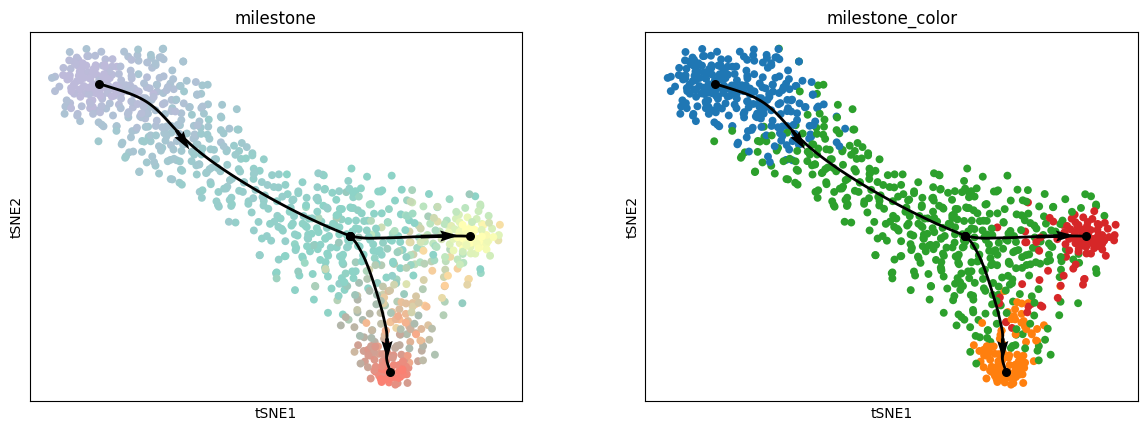

In [2]:
fadata = cfe.data.FateAnnData.read_dynverse_simulation_data()

cluster_key = "milestone_color"
fadata.group_onto_nearest_milestones(cluster_key=cluster_key) # new cluster color
sc.tl.tsne(fadata)

cluster_key_list = ["milestone", cluster_key]
cfe.plot.plot_graph(fadata, color=cluster_key)
cfe.plot.plot_trajectory(fadata, basis="tsne", color=cluster_key_list)
fadata

Method

[2025年01月14日 21时42分03秒] INFO     method_backend:                                                             
                                       <cfe.method.fate_dynverse_docker_backend.DynverseDockerBackend object at    
                                       0x7705880cf640>                                                             


<Axes: title={'center': 'milestone_color'}, xlabel='tSNE1', ylabel='tSNE2'>

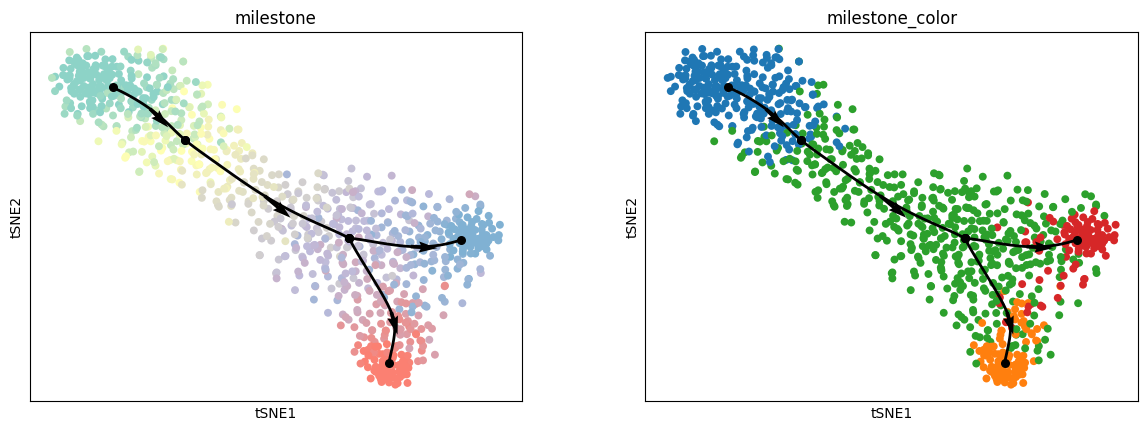

In [3]:
comp1_method = cfe.method.FateMethod(method_name="slingshot")

comp1_method.infer_trajectory(fadata)

cfe.plot.plot_trajectory(fadata, basis="tsne", color=cluster_key_list)

[2025年01月14日 21时42分15秒] INFO     method_backend:                                                             
                                       <cfe.method.fate_dynverse_docker_backend.DynverseDockerBackend object at    
                                       0x7704cf04af50>                                                             


<Axes: title={'center': 'milestone_color'}, xlabel='tSNE1', ylabel='tSNE2'>

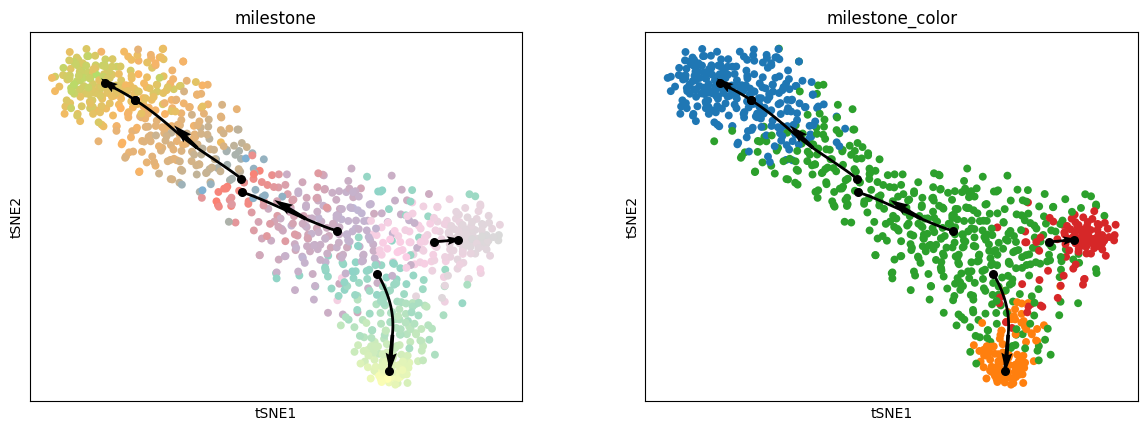

In [4]:
paga_method = cfe.method.FateMethod(method_name="paga")

prior_information = {
    "start_id": "C1",
    "groups_id": fadata.obs[cluster_key].tolist()
}
parameters = {"filter_features": False, "connectivity_cutoff": 0.5}
fadata.add_prior_information(**prior_information)  # add prior information to fadata
paga_method.infer_trajectory(fadata, parameters=parameters)

cfe.plot.plot_trajectory(fadata, basis="tsne", color=cluster_key_list)

[2025年01月14日 21时42分24秒] INFO     method_backend:                                                             
                                       <cfe.method.fate_dynverse_docker_backend.DynverseDockerBackend object at    
                                       0x7704ced6a2c0>                                                             


<Axes: title={'center': 'milestone_color'}, xlabel='tSNE1', ylabel='tSNE2'>

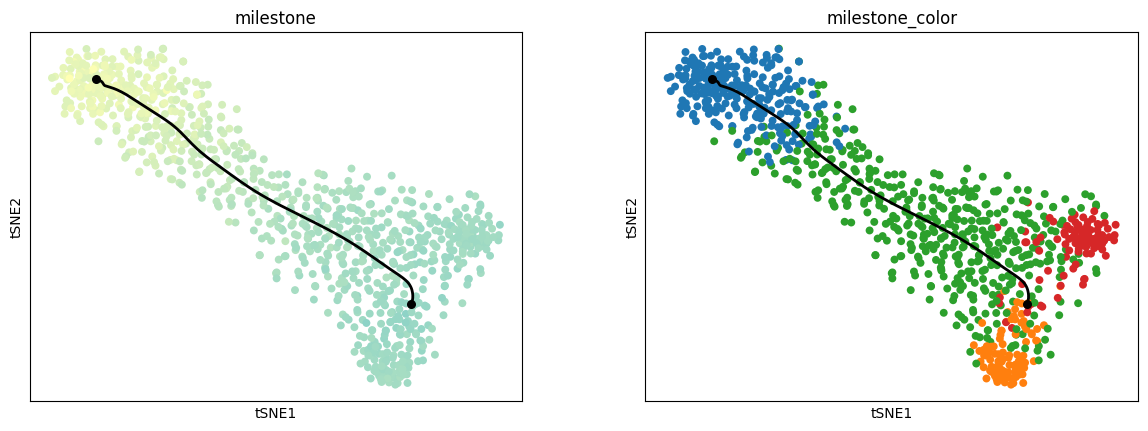

In [5]:
comp1_method = cfe.method.FateMethod(method_name="comp1")

comp1_method.infer_trajectory(fadata)

cfe.plot.plot_trajectory(fadata, basis="tsne", color=cluster_key_list)

Plot

In [6]:
fadata.uns["cfe"]["trajectory_history_dict"]

{'default_model_name': {'milestone_wrapper': <cfe.data.fate_milestone_wrapper.MilestoneWrapper at 0x7704d3b6a110>,
  'waypoint_wrapper': <cfe.data.fate_waypoint_wrapper.WaypointWrapper at 0x7704cef73be0>},
 '20250114_214203__slingshot-dynverse_docker__uFGg5J3cWs': {'milestone_wrapper': <cfe.data.fate_milestone_wrapper.MilestoneWrapper at 0x7704ceff59f0>,
  'waypoint_wrapper': <cfe.data.fate_waypoint_wrapper.WaypointWrapper at 0x7704cef54760>},
 '20250114_214215__paga-dynverse_docker__9EBB0S4zCW': {'milestone_wrapper': <cfe.data.fate_milestone_wrapper.MilestoneWrapper at 0x7704ceff7c40>,
  'waypoint_wrapper': <cfe.data.fate_waypoint_wrapper.WaypointWrapper at 0x7704ced6ab30>}}

# TODO: 指标